<a href="https://colab.research.google.com/github/Manoj101295/Cotton-disease-deep-learning/blob/main/cotton_disease_InceptionV3_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [3]:
image_size=[224,224]

In [4]:
inception=InceptionV3(input_shape=(image_size)+ [3],weights="imagenet",include_top=False)

In [5]:
for layer in  inception.layers:
  layer.tranable=False 

In [6]:
from glob import glob

In [7]:
train_path="'/content/drive/MyDrive/cotton diesease/Dataset/train"
test_path='/content/drive/MyDrive/cotton diesease/Dataset/test'

In [8]:
folders=glob('/content/drive/MyDrive/cotton diesease/Dataset/train/*')

In [9]:
folders

['/content/drive/MyDrive/cotton diesease/Dataset/train/fresh cotton plant',
 '/content/drive/MyDrive/cotton diesease/Dataset/train/fresh cotton leaf',
 '/content/drive/MyDrive/cotton diesease/Dataset/train/diseased cotton plant',
 '/content/drive/MyDrive/cotton diesease/Dataset/train/diseased cotton leaf']

In [10]:
from tensorflow.keras.layers import Flatten,Dense

In [11]:
x=Flatten()(inception.output)

In [12]:
prediction=Dense(len(folders),activation="softmax")(x)

In [13]:
from tensorflow.keras.models import Model


In [14]:
model=Model(inputs=inception.input,outputs=prediction)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.3,
                                 vertical_flip=True,
                                 horizontal_flip=True
)

In [19]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [20]:
train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/cotton diesease/Dataset/train',
                                             batch_size=32,
                                             class_mode='categorical',
                                             target_size=(224,224))

Found 1951 images belonging to 4 classes.


In [21]:
test_data=test_datagen.flow_from_directory('/content/drive/MyDrive/cotton diesease/Dataset/test',
                                           target_size=(224,224),
                                           class_mode='categorical', batch_size=32)

Found 18 images belonging to 4 classes.


In [24]:
r=model.fit_generator(train_data,
                    validation_data=test_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(test_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
61/61 [==============================] - 39s 634ms/step - loss: 0.7828 - accuracy: 0.7386 - val_loss: 0.7725 - val_accuracy: 0.7222
Epoch 2/5
61/61 [==============================] - 36s 587ms/step - loss: 0.5888 - accuracy: 0.7965 - val_loss: 0.9364 - val_accuracy: 0.7222
Epoch 3/5
61/61 [==============================] - 36s 586ms/step - loss: 0.7197 - accuracy: 0.7847 - val_loss: 79.3941 - val_accuracy: 0.6111
Epoch 4/5
61/61 [==============================] - 36s 586ms/step - loss: 0.5359 - accuracy: 0.8391 - val_loss: 38.6808 - val_accuracy: 0.5000
Epoch 5/5
61/61 [==============================] - 36s 587ms/step - loss: 0.3733 - accuracy: 0.8734 - val_loss: 0.4099 - val_accuracy: 0.8333


In [25]:
import matplotlib.pyplot as plt

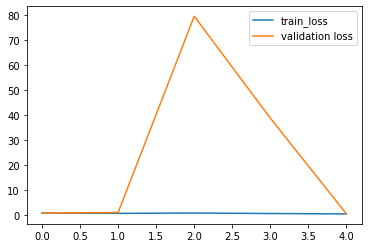

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
plt.savefig("loss")

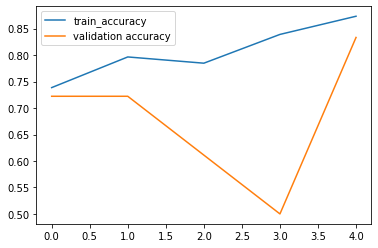

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('acc valAcc')

In [30]:
from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [31]:
y_pred=model.predict(test_data)
y_pred

array([[1.4579238e-02, 3.8230491e-03, 9.7749037e-01, 4.1074790e-03],
       [3.1335380e-02, 7.8411977e-04, 9.6348047e-01, 4.4000214e-03],
       [1.0000000e+00, 8.7893789e-11, 2.3674097e-13, 1.3687126e-09],
       [8.8341096e-03, 6.6776752e-01, 2.9162070e-01, 3.1777624e-02],
       [5.0243931e-03, 3.5683000e-01, 7.9301402e-02, 5.5884415e-01],
       [1.0000000e+00, 3.8661370e-17, 8.6483884e-27, 8.4339611e-16],
       [1.1412642e-03, 9.7242177e-01, 4.2520990e-03, 2.2184845e-02],
       [5.1490782e-04, 4.2375818e-02, 8.3044749e-03, 9.4880480e-01],
       [9.9999678e-01, 6.3834040e-07, 1.1419645e-06, 1.4666833e-06],
       [1.3238045e-03, 9.0319461e-01, 5.0096861e-03, 9.0471946e-02],
       [8.2648045e-04, 3.2748941e-01, 1.1296864e-02, 6.6038728e-01],
       [3.2641999e-02, 9.2777741e-01, 7.0001595e-03, 3.2580514e-02],
       [3.6356794e-03, 1.4916452e-03, 9.9380350e-01, 1.0691548e-03],
       [7.5773910e-02, 8.2317344e-04, 9.2148381e-01, 1.9190734e-03],
       [1.3125785e-02, 2.6259261e-

In [32]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [33]:
y_pred

array([2, 2, 0, 1, 3, 0, 1, 3, 0, 1, 3, 1, 2, 2, 3, 1, 1, 3])

In [35]:
from tensorflow.keras.preprocessing import image

In [37]:
img=image.load_img('/content/drive/MyDrive/cotton diesease/Dataset/val/diseased cotton plant/dd (10)_iaip.jpg',target_size=(224,224))


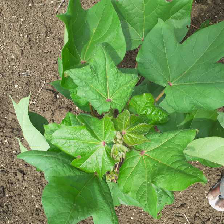

In [38]:
img

In [47]:
x=image.img_to_array(img)

In [48]:
x.shape

(224, 224, 3)

In [42]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [50]:
x=x/255
x


array([[[0.00258362, 0.00236832, 0.00196847],
        [0.00233756, 0.00212226, 0.00172241],
        [0.00215302, 0.00193772, 0.00153787],
        ...,
        [0.00113802, 0.00104575, 0.00083045],
        [0.00081507, 0.0007228 , 0.0005075 ],
        [0.00070742, 0.00061515, 0.00039985]],

       [[0.00267589, 0.00246059, 0.00206075],
        [0.00193772, 0.00172241, 0.00132257],
        [0.00204537, 0.00183007, 0.00143022],
        ...,
        [0.0009381 , 0.00084583, 0.00063053],
        [0.00096886, 0.00087659, 0.00066128],
        [0.00083045, 0.00073818, 0.00052288]],

       [[0.00206075, 0.00184544, 0.0014456 ],
        [0.00290657, 0.00269127, 0.00229143],
        [0.00239908, 0.00218378, 0.00178393],
        ...,
        [0.00095348, 0.00086121, 0.00064591],
        [0.0009381 , 0.00084583, 0.00063053],
        [0.0009381 , 0.00084583, 0.00063053]],

       ...,

       [[0.00221453, 0.00198385, 0.0016609 ],
        [0.0021684 , 0.00193772, 0.00161476],
        [0.00199923, 0

In [51]:
x=np.expand_dims(x,axis=0)
image_data=preprocess_input(x)
image_data.shape

(1, 224, 224, 3)

In [57]:
y=model.predict(image_data)
y

array([[0.00114492, 0.9015718 , 0.00694555, 0.09033775]], dtype=float32)

In [58]:
y=np.argmax(y)

In [56]:
y

1

In [59]:
if y==0:
  print("Diseased cotton leaf")
elif y==1:
  print('Diseased cotton plant')
elif y==2:
  print("Fresh cotton leaf ")
else:
  print("Fresh cotton plant")

Diseased cotton plant
